# Progetto d'esame di Data Analysis in Experimental Physics with Machine Learning

Gruppo composto dagli studenti Luca Attinà, Sharis Feriotto e Matteo Marchisio Caprioglio

Dataset ipotesi: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [9]:
# %conda install -c conda-forge kagglehub


In [10]:
# Prova import dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/2mc/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [11]:
train_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
val_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = path + "/test"


In [12]:
train_path


'/Users/2mc/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [13]:
%ls "{train_path}"
%ls "{val_path}"


Apple___Apple_scab/
Apple___Black_rot/
Apple___Cedar_apple_rust/
Apple___healthy/
Blueberry___healthy/
Cherry_(including_sour)___Powdery_mildew/
Cherry_(including_sour)___healthy/
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/
Corn_(maize)___Common_rust_/
Corn_(maize)___Northern_Leaf_Blight/
Corn_(maize)___healthy/
Grape___Black_rot/
Grape___Esca_(Black_Measles)/
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/
Grape___healthy/
Orange___Haunglongbing_(Citrus_greening)/
Peach___Bacterial_spot/
Peach___healthy/
Pepper,_bell___Bacterial_spot/
Pepper,_bell___healthy/
Potato___Early_blight/
Potato___Late_blight/
Potato___healthy/
Raspberry___healthy/
Soybean___healthy/
Squash___Powdery_mildew/
Strawberry___Leaf_scorch/
Strawberry___healthy/
Tomato___Bacterial_spot/
Tomato___Early_blight/
Tomato___Late_blight/
Tomato___Leaf_Mold/
Tomato___Septoria_leaf_spot/
Tomato___Spider_mites Two-spotted_spider_mite/
Tomato___Target_Spot/
Tomato___Tomato_Yellow_Leaf_Curl_Virus/
Tomato___Tomato_mosaic_vir

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Activation, BatchNormalization, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D, ReLU, Rescaling
from keras.optimizers.legacy import Adam, SGD
from keras.losses import CategoricalCrossentropy

from keras.metrics import CategoricalAccuracy, Precision, Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [15]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
img_size = (128, 128)
batch_size = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode='rgb',
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode='rgb',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode='rgb',
)


Found 70295 files belonging to 38 classes.


2025-07-10 12:05:49.139925: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-10 12:05:49.139955: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-07-10 12:05:49.139962: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2025-07-10 12:05:49.139991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-10 12:05:49.140013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 17572 files belonging to 38 classes.
Found 33 files belonging to 1 classes.


In [17]:
# ipotesi modello
# convolutional 2d
# relu activation
# maxpooling forse?


In [18]:
def simple_cnn(input_shape=(img_size[0], img_size[1], 3), num_classes=38):
    model = Sequential([
        Rescaling(1./255, input_shape=input_shape),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = simple_cnn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0

In [ ]:
optimizer = Adam(learning_rate=0.0002)
# optimizer = SGD(learning_rate=0.05, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [20]:
n_epochs = 30

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=n_epochs,
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
        # ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
        # ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
    ]
)


Epoch 1/30
  1/550 [..............................] - ETA: 2:52 - loss: 3.6803 - accuracy: 0.0156

2025-07-10 12:05:49.792582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


550/550 [==============================] - 17s 30ms/step - loss: 3.0038 - accuracy: 0.2061 - val_loss: 2.4664 - val_accuracy: 0.3282
Epoch 2/30
550/550 [==============================] - 17s 30ms/step - loss: 2.1664 - accuracy: 0.4006 - val_loss: 2.0180 - val_accuracy: 0.4248
Epoch 3/30
550/550 [==============================] - 17s 30ms/step - loss: 1.8509 - accuracy: 0.4732 - val_loss: 1.7550 - val_accuracy: 0.4992
Epoch 4/30
550/550 [==============================] - 17s 30ms/step - loss: 1.6514 - accuracy: 0.5258 - val_loss: 1.5447 - val_accuracy: 0.5448
Epoch 5/30
550/550 [==============================] - 17s 30ms/step - loss: 1.5966 - accuracy: 0.5462 - val_loss: 1.5277 - val_accuracy: 0.5475
Epoch 6/30
550/550 [==============================] - 17s 31ms/step - loss: 1.4019 - accuracy: 0.5944 - val_loss: 1.3996 - val_accuracy: 0.5938
Epoch 7/30
550/550 [==============================] - 17s 30ms/step - loss: 1.3072 - accuracy: 0.6185 - val_loss: 1.2959 - val_accuracy: 0.6214
Epo

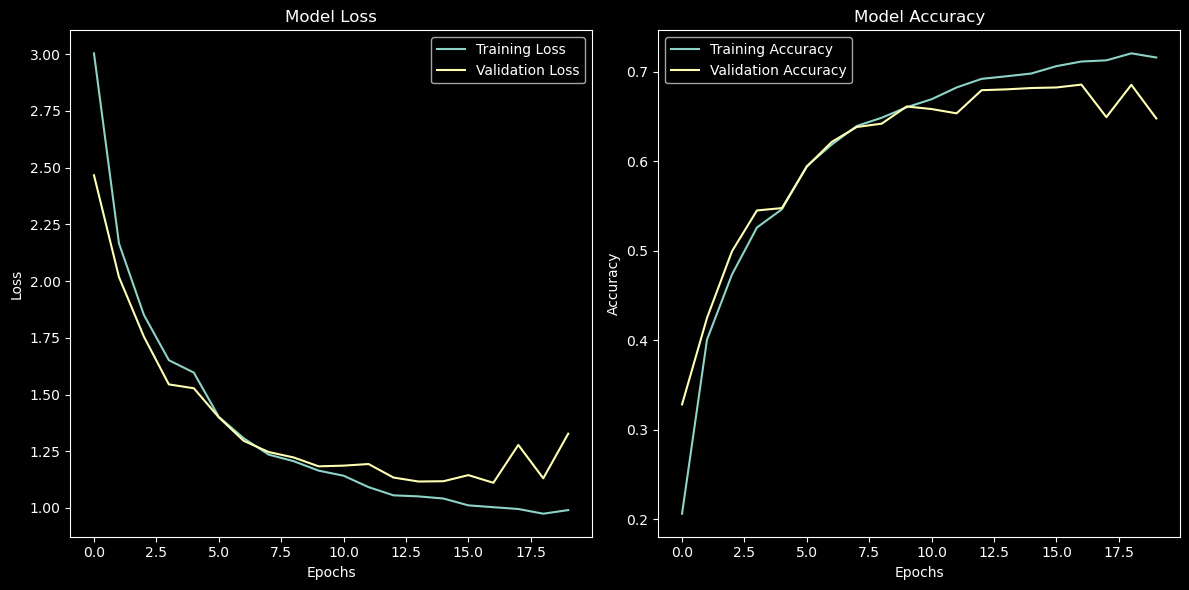

In [21]:
# plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
